In [51]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Consertando a exibição do describe
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Ignorando avisos de depreciação
warnings.filterwarnings('ignore')
# Configurando o pyplot
plt.figure(figsize=(20, 12))


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score


%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<Figure size 2000x1200 with 0 Axes>

In [52]:
# Carregando os dados do ENEM 2023
enemData = pd.read_csv('MICRODADOS_ENEM_2023.csv', encoding='latin1', sep=';')

In [53]:
# Exibindo o formato dos dados
enemData.shape

(3933955, 76)

In [54]:
# Exibindo informações básicas dos dados
enemData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [55]:
# Criando a coluna 'PRESENCA_COMPLETA' com base na presença em todas as provas
enemData['PRESENCA_COMPLETA'] = enemData.apply(
    lambda row: 1 if (
        row['TP_PRESENCA_CN'] == 1 and
        row['TP_PRESENCA_CH'] == 1 and
        row['TP_PRESENCA_LC'] == 1 and
        row['TP_PRESENCA_MT'] == 1
    ) else 0,
    axis=1
)

In [56]:
# Contagem de valores na nova coluna 'PRESENCA_COMPLETA'
enemData.PRESENCA_COMPLETA.value_counts()

PRESENCA_COMPLETA
1    2678264
0    1255691
Name: count, dtype: int64

In [57]:
# Função para agrupar faixa etária
def agrupar_faixa_etaria(faixa):
    if faixa <= 5:
        return 1 # Jovens (17-20)
    elif faixa <= 10:
        return 2 # Jovens Adultos (21-25)
    elif faixa <= 16:
        return 3 # Adultos (26-55)
    else:
        return 4 # Idosos (56 Acima)

# Aplicando a função para criar a nova coluna
enemData['GRUPO_ETARIO'] = enemData['TP_FAIXA_ETARIA'].apply(agrupar_faixa_etaria)

In [58]:
# Contagem dos valores únicos na coluna 'GRUPO_ETARIO'
enemData.GRUPO_ETARIO.value_counts()

GRUPO_ETARIO
1    2705256
3     609145
2     597584
4      21970
Name: count, dtype: int64

In [59]:
# Exibindo informações atualizadas dos dados
enemData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 78 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [60]:
# Mapeando valores categóricos para numéricos na coluna Q006
enemData['Q006'] = enemData['Q006'].map({
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16
})

In [61]:
# Contagem dos valores únicos na coluna 'Q006'
enemData.Q006.value_counts()

Q006
1     1245271
2      650942
3      437366
4      293994
0      268053
6      261327
5      171344
7      139279
8       85970
9       75179
10      59631
16      51489
13      41565
14      41218
11      39596
15      38105
12      33626
Name: count, dtype: int64

In [62]:
# Mapeando valores categóricos para numéricos na coluna Q024
enemData['Q024'] = enemData['Q024'].map({
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4
})

In [63]:
# Contagem dos valores únicos na coluna 'Q024'
enemData.Q024.value_counts()

Q024
0    2041637
1    1362634
2     341120
3     126296
4      62268
Name: count, dtype: int64

In [64]:
# Mapeando valores categóricos para numéricos na coluna Q025
enemData['Q025'] = enemData['Q025'].map({
    'A': 0,
    'B': 1
})

In [65]:
# Contagem dos valores únicos na coluna 'Q025'
enemData.Q025.value_counts()

Q025
1    3558451
0     375504
Name: count, dtype: int64

In [66]:
# Selecionando colunas específicas para análise
enemSelectedData = enemData.iloc[:,[22,7,56,74,75,76,77]]

In [67]:
# Exibindo o formato dos dados selecionados
enemSelectedData.shape

(3933955, 7)

In [68]:
# Contagem dos valores únicos na coluna 'SG_UF_PROVA'
enemSelectedData['SG_UF_PROVA'].value_counts()

SG_UF_PROVA
SP    590767
MG    358575
BA    324268
RJ    282296
CE    241960
PA    229162
PE    218859
PR    166506
MA    165756
RS    159919
GO    149110
PB    124511
RN    100706
PI     99639
AM     92916
SC     91263
AL     82760
ES     73724
DF     72975
SE     65540
MT     63912
MS     47455
RO     36038
TO     32618
AP     28807
AC     24274
RR      9639
Name: count, dtype: int64

In [69]:
# Ordenando e mapeando estados para números
estados = sorted(enemSelectedData['SG_UF_PROVA'].unique())
estadosParaNumeros = {estado: idx + 1 for idx, estado in enumerate(estados)}
enemSelectedData['SG_UF_PROVA_NUM'] = enemSelectedData['SG_UF_PROVA'].map(estadosParaNumeros)

estados

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

In [70]:
# Calculando a matriz de correlação
corr = enemSelectedData.iloc[:,1:].corr()
corr

,TP_ST_CONCLUSAO,Q006,Q024,Q025,PRESENCA_COMPLETA,GRUPO_ETARIO,SG_UF_PROVA_NUM
TP_ST_CONCLUSAO,1.00,0.19,0.11,0.04,0.20,-0.52,0.04
Q006,0.19,1.00,0.65,0.22,0.15,-0.15,0.19
Q024,0.11,0.65,1.00,0.23,0.13,-0.08,0.17
Q025,0.04,0.22,0.23,1.00,0.06,-0.07,0.11
PRESENCA_COMPLETA,0.20,0.15,0.13,0.06,1.00,-0.25,0.02
GRUPO_ETARIO,-0.52,-0.15,-0.08,-0.07,-0.25,1.00,-0.06
SG_UF_PROVA_NUM,0.04,0.19,0.17,0.11,0.02,-0.06,1.00


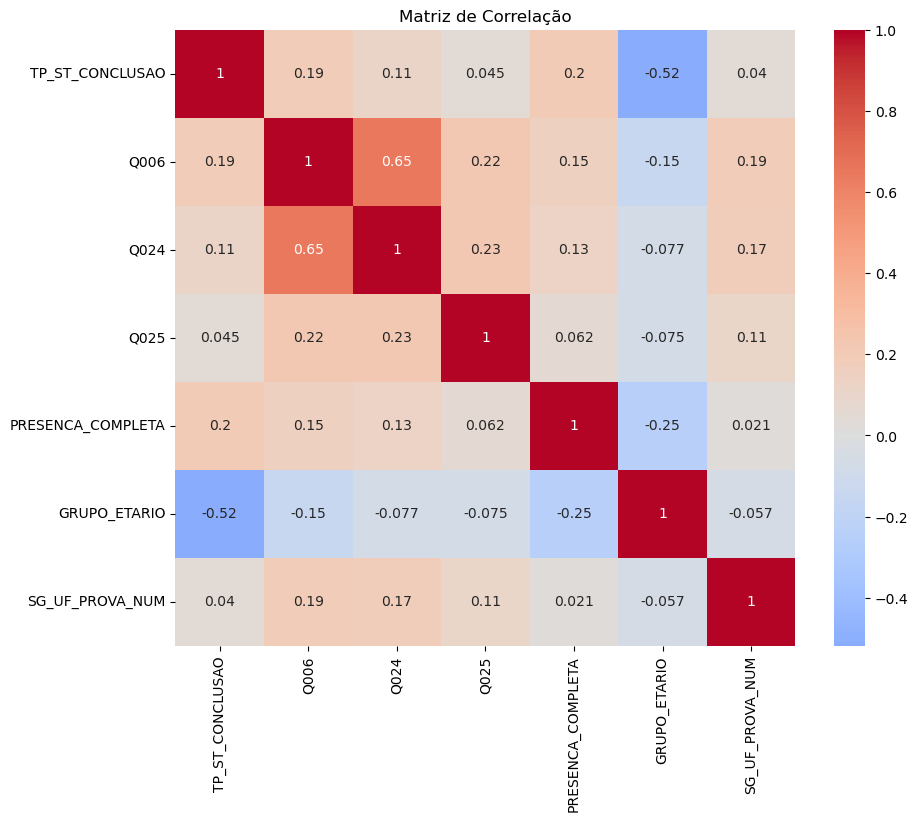

In [71]:
# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

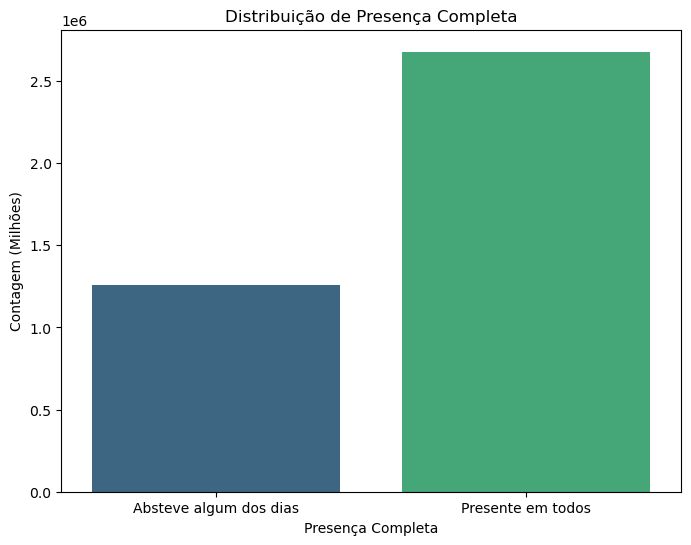

In [72]:
# Gráfico de barras para a presença completa
plt.figure(figsize=(8, 6))
sns.countplot(x='PRESENCA_COMPLETA', data=enemSelectedData, palette='viridis')
plt.title('Distribuição de Presença Completa')
plt.xlabel('Presença Completa')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0,1], labels=['Absteve algum dos dias', 'Presente em todos'])
plt.show()

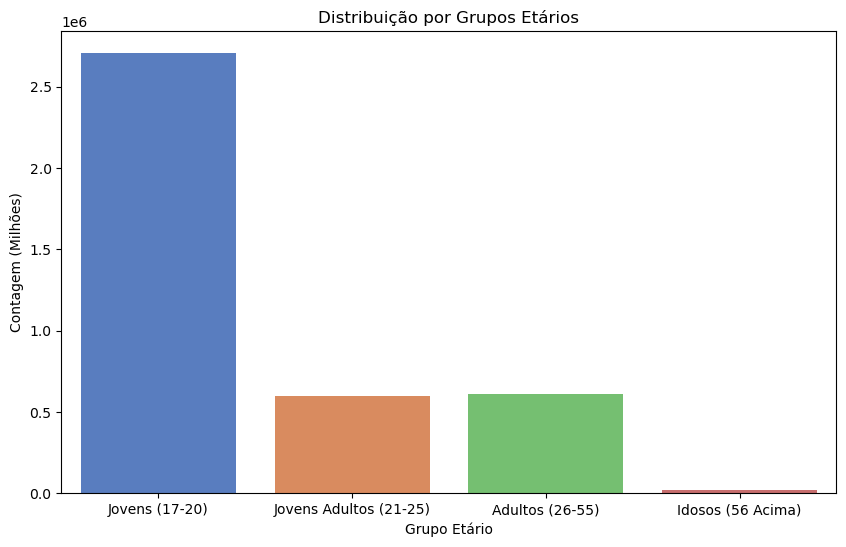

In [73]:
# Gráfico de distribuição de grupos etários
plt.figure(figsize=(10, 6))
sns.countplot(x='GRUPO_ETARIO', data=enemSelectedData, palette='muted')
plt.title('Distribuição por Grupos Etários')
plt.xlabel('Grupo Etário')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Jovens (17-20)', 'Jovens Adultos (21-25)', 'Adultos (26-55)', 'Idosos (56 Acima)'])
plt.show()


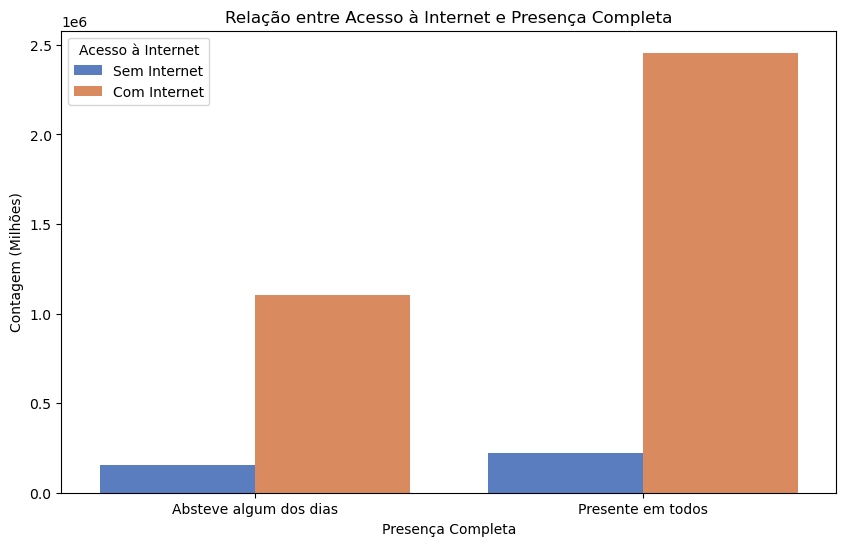

In [74]:
# Relação acesso internet e presença
plt.figure(figsize=(10, 6))
sns.countplot(x='PRESENCA_COMPLETA', hue='Q025', data=enemSelectedData, palette='muted')
plt.title('Relação entre Acesso à Internet e Presença Completa')
plt.xlabel('Presença Completa')
plt.ylabel('Contagem (Milhões)')
plt.legend(title='Acesso à Internet', loc='upper left', labels=['Sem Internet', 'Com Internet'])
plt.xticks(ticks=[0,1], labels=['Absteve algum dos dias', 'Presente em todos'])
plt.show()

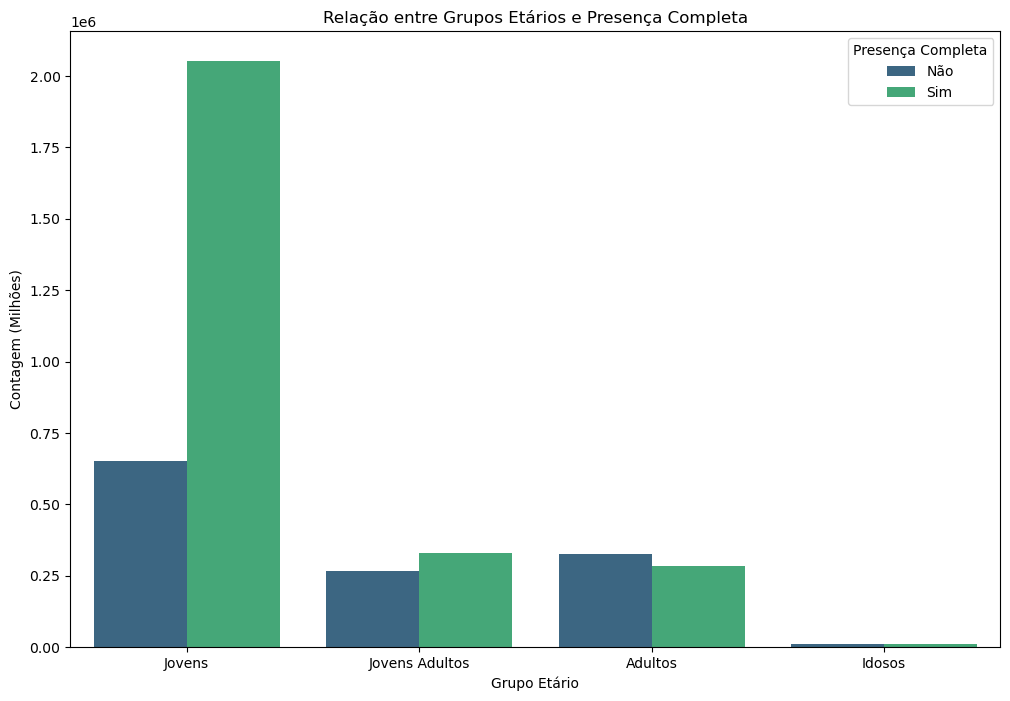

In [75]:
# Criando gráfico de presença por grupos etários
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='GRUPO_ETARIO', hue='PRESENCA_COMPLETA', data=enemSelectedData, palette='viridis')


plt.title('Relação entre Grupos Etários e Presença Completa')
plt.xlabel('Grupo Etário')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Jovens', 'Jovens Adultos', 'Adultos', 'Idosos'])
plt.legend(title='Presença Completa', loc='upper right', labels=['Não', 'Sim'])
plt.show()


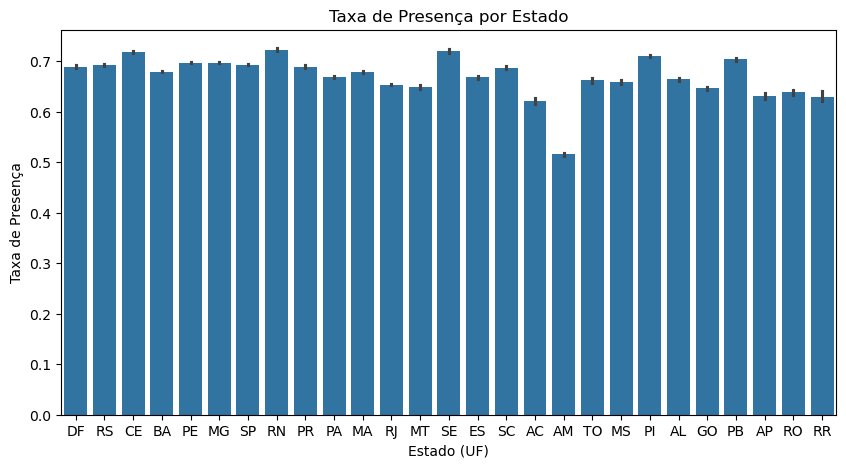

In [76]:
# Criando gráfico de presença por estado
plt.figure(figsize=(10,5))
sns.barplot(x='SG_UF_PROVA', y='PRESENCA_COMPLETA', data=enemSelectedData)
plt.xlabel('Estado (UF)')
plt.ylabel('Taxa de Presença')
plt.title('Taxa de Presença por Estado')
plt.show()

In [77]:
# Selecionando as features (variáveis independentes)
X = enemSelectedData.iloc[:,[1,2,3,4,6,7]]

# Selecionando o target (variável dependente)
y = enemSelectedData.iloc[:,5]

In [78]:
# Separando os dados em conjuntos de treinamento e teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [79]:
# Verificando separamento
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3147164, 6)
(786791, 6)
(3147164,)
(786791,)


In [80]:
# Criando função que irá avaliar os modelos
def avaliar_modelo(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Calculando métricas de avaliação
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    revocacao = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Exibindo as métricas
    print(f"Acurácia: {acuracia:.2f}")
    print(f"Precisão: {precisao:.2f}")
    print(f"Revocação: {revocacao:.2f}")
    print(f"F1-score: {f1:.2f}")

In [81]:
# Treinando e avaliando Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
print("Logistic Regression:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)


# Treinando e avaliando Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
print("\nDecision Tree:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)

# Treinando e avaliando Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
print("\nRandom Forest:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)

# Treinando e avaliando Perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
print("Perceptron:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)

# Treinando e avaliando K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
print("\nK-Nearest Neighbors:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)


Logistic Regression:
Acurácia: 0.69
Precisão: 0.71
Revocação: 0.91
F1-score: 0.80

Decision Tree:
Acurácia: 0.70
Precisão: 0.72
Revocação: 0.90
F1-score: 0.80

Random Forest:
Acurácia: 0.70
Precisão: 0.72
Revocação: 0.91
F1-score: 0.80
Perceptron:
Acurácia: 0.69
Precisão: 0.70
Revocação: 0.94
F1-score: 0.80

K-Nearest Neighbors:
Acurácia: 0.65
Precisão: 0.72
Revocação: 0.79
F1-score: 0.75
